# 任务1：自定义函数实现k-means聚类

- 补全完整的K-Means算法代码
- 在数据集data.csv上评价 K-Means 算法的聚类结果
- 绘出质心与所属样本

> 待补全代码

In [50]:
# data = pd.read_csv('data.csv')
# data = data.iloc[:,0:2]
# data.shape
# np.mat(np.zeros((79, 2))).shape
# data.iloc[0].shape
# data.iloc[0], data.iloc[1], data.iloc[0] - data.iloc[1], np.power(data.iloc[0] - data.iloc[1], 2), np.sqrt(np.power(data.iloc[0]-data.iloc[1], 2).sum())

# np.mat(np.zeros((79, 2)))[:, 0] == 0
# temp = np.mat(data[np.mat(np.zeros((79, 2)))[:, 0] == 0])
# np.mean(temp,axis=0)

# np.mat(np.array(data.iloc[0]))

最终质心：
[[ 2.63711921  3.06283895]
 [-2.4429474   2.79575765]
 [-3.50360111 -2.93524711]
 [ 2.65664152 -2.83520929]]
点所属簇的标签：
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2.]]


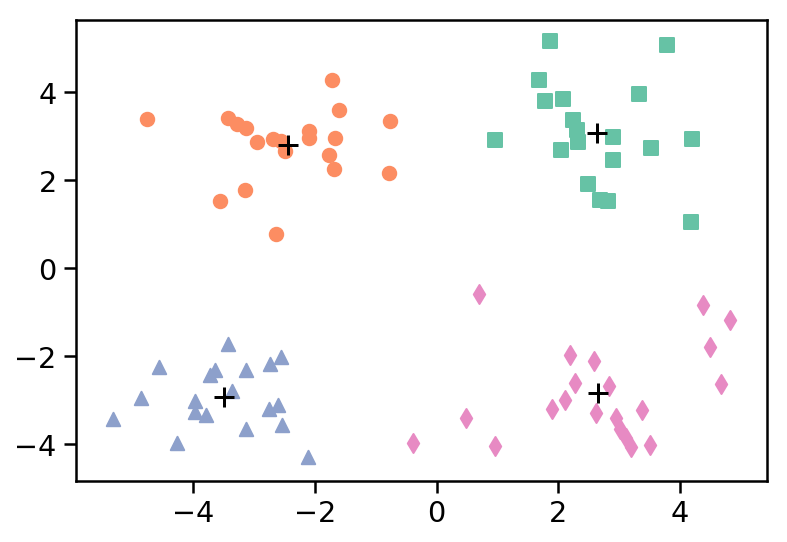

In [51]:
import numpy as np

#欧式距离计算函数
def distEuclidean(vecA, vecB):
    return np.sqrt(np.power(vecA-vecB, 2).sum())

#随机初始化质心选择函数
def randCent(dataArr, k):
    n = np.shape(dataArr)[1] #获取dataArr的列，即数据维数
    centroids = np.mat(np.zeros((k, n))) #创建初始的质心矩阵
    for i in range(n):
        min_ = np.min(dataArr.values[:,i])
        max_ = np.max(dataArr.values[:,i])
        range_ = float(max_ - min_)
        np.random.seed(12345) #设置种子
        centroids[:,i] = min_ + range_ * np.random.rand(k, 1)
        # random.rand(行，列)值为[0,1)的矩阵
    return centroids

#kMeans函数
def kMeans(dataArr, k):
    m = dataArr.shape[0] # 获取行数 79
    clusterAssment = np.mat(np.zeros((m, 2))) # 创建存储簇分配结果的矩阵 79×2
    clusterChanged = True # 簇分配结果改变标志
    centroids = randCent(dataArr, k) #创建初始质心
    # print(centroids)
    while clusterChanged:
        clusterChanged = False

        # 1. 遍历每个数据点，计算其与各簇中心的距离，以最近簇作为分配结果
        for i in range(m):
            #初始化最小距离及其索引
            minDist = float('inf')
            minIndex = -1
            #循环查看距离各个质心的距离
            for j in range(k):
                #调用distEuclidean计算样本i到聚类中心j的距离
                dist_ = distEuclidean(np.mat(np.array(data.iloc[i])), centroids[j])  # 注意此处计算的是与质心的距离
                if dist_ < minDist: #当前质心为最短距离
                    minDist = dist_
                    minIndex = j
            # 聚类结果变化，继续聚类
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            #更新变化的聚类结果和平方差
            clusterAssment[i,:] = minIndex, minDist**2
            
        # 2. 重新计算各簇的中心
        for cent in range(k):
            temp_ = np.array(dataArr[clusterAssment[:, 0] == cent])  # 通过布尔索引取出类中心为cent的所有data
            centroids[cent, :] = np.mean(temp_,axis=0)

    return centroids, clusterAssment

#画图函数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn包
sns.set_context("notebook",font_scale=1.3) # notebook格式，放大横纵坐标标记
sns.set_palette('Set2') # 配色使用Set2  
data = pd.read_csv('data.csv')
data = data.iloc[:,0:2]
#print(data)
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # retina高清显示
def plotResult(data, k):
    np.random.seed(6)
    centroids,clusterAssment = kMeans(data, k)
    print("最终质心：")
    print(centroids)
    print("点所属簇的标签：")
    print(clusterAssment[:, 0].T)
    rect=[0.1, 0.1, 0.8, 0.8]
    fig = plt.figure()
    markers = ['s', 'o', '^', 'd']
    ax = fig.add_axes(rect)
    for cent in range(4):
        # 簇内数据矩阵和簇中心
        ptsInCluster = data.values[np.nonzero(clusterAssment[:, 0].A==cent)[0]]
        ax.scatter(ptsInCluster[:, 0], 
                   ptsInCluster[:, 1],
                   marker=markers[cent],
                   s=45)

    ax.scatter(centroids[:, 0].flatten().A[0], 
               centroids[:, 1].flatten().A[0], 
               marker='+',
               s=100,
               c='k')

#画图
plotResult(data, 4)

# 任务2: 调用sklearn中的kMeans

- 调用sklearn中提供的kMeans算法
- 在数据集data.csv上评价 K-Means 算法的聚类结果
- 绘出质心与所属样本
- 对比分析与自己实验的kmeans聚类的实验结果的差异

> 待补全代码

最终质心：
[[-3.34778945 -2.98727265]
 [ 2.63711921  3.06283895]
 [ 2.808842   -2.77818185]
 [-2.4429474   2.79575765]]
点所属簇的标签：
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


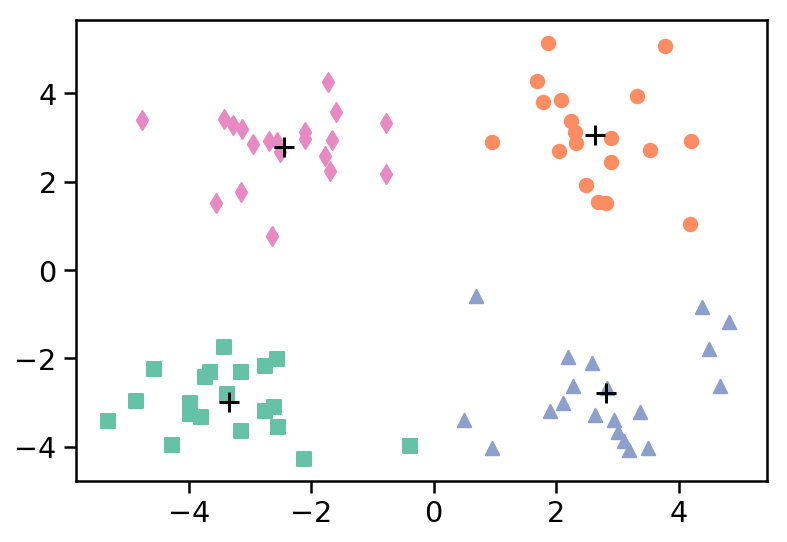

In [52]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn包

#调用sklearn中KMeans函数
kmeans_ = KMeans(n_clusters=4)
#模型训练
kmeans_.fit(data)

# 画图
sns.set_context("notebook",font_scale=1.3) # notebook格式，放大横纵坐标标记
sns.set_palette('Set2') # 配色使用Set2  
data = pd.read_csv('data.csv')
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # retina高清显示
def plotResult(data, k):
    np.random.seed(6)
    centroids = kmeans_.cluster_centers_
    clusterAssment = kmeans_.labels_
    print("最终质心：")
    print(centroids)
    print("点所属簇的标签：")
    print(clusterAssment)
    rect=[0.1, 0.1, 0.8, 0.8]
    fig = plt.figure()
    markers = ['s', 'o', '^', 'd']
    ax = fig.add_axes(rect)
    for cent in range(4):
        # 簇内数据矩阵和簇中心
        ptsInCluster = data.values[np.nonzero(clusterAssment==cent)[0]]
        ax.scatter(ptsInCluster[:, 0], 
                   ptsInCluster[:, 1],
                   marker=markers[cent],
                   s=45)

    ax.scatter(centroids[:, 0].flatten(), 
               centroids[:, 1].flatten(), 
               marker='+',
               s=100,
               c='k')

#画图
plotResult(data, 4)

In [53]:
# help(KMeans())
# from sklearn.cluster import KMeans

# x1 = np.array([1, 1])
# x2 = np.array([2, 1])
# x3 = np.array([4, 3])
# x4 = np.array([5, 4])
# temp_data = np.vstack((x1, x2, x3, x4))

# temp_data = pd.DataFrame(temp_data)

# kmeans_ = KMeans(n_clusters=2)
# kmeans_.fit(temp_data)
# centroids = kmeans_.cluster_centers_
# clusterAssment = kmeans_.labels_
# print("最终质心：")
# print(centroids)
# print("点所属簇的标签：")
# print(clusterAssment)